# Avocado price prediction

In [6]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [7]:
avocado = pd.read_csv('avocado.csv')

In [10]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [12]:
avocado.sort_values('Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


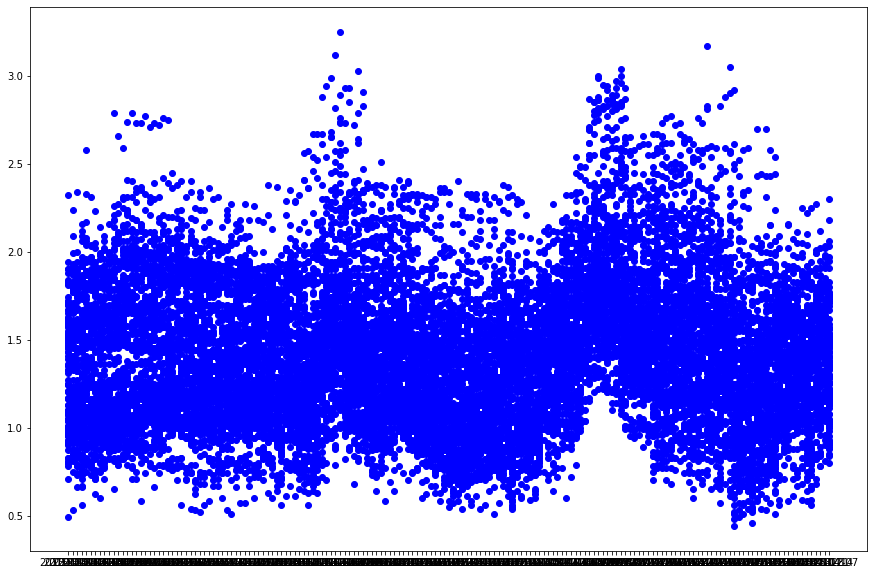

In [17]:
plt.figure(figsize=(15,10))
plt.plot(avocado['Date'],avocado['AveragePrice'],'bo')

<AxesSubplot:xlabel='year', ylabel='count'>

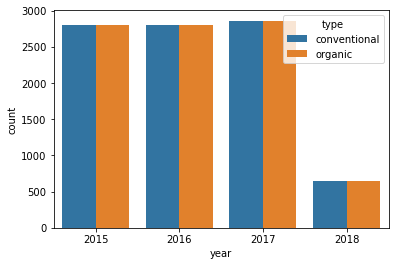

In [32]:
sns.countplot(data = avocado, x= 'year',hue='type')

<AxesSubplot:xlabel='type', ylabel='count'>

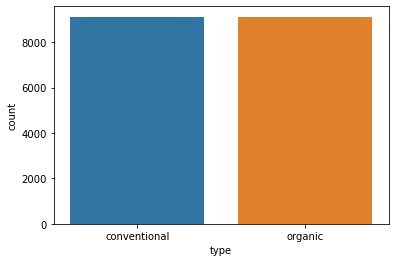

In [27]:
sns.countplot(data = avocado, x= 'type')

<AxesSubplot:xlabel='type', ylabel='count'>

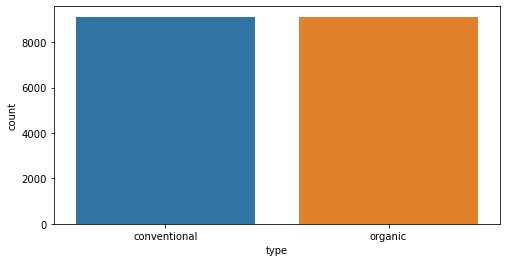

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data = avocado, x= 'type')

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

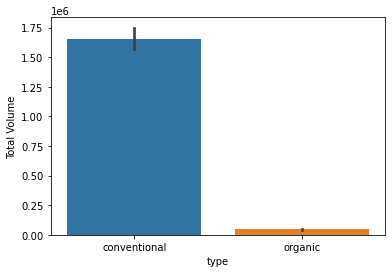

In [36]:
sns.barplot(data= avocado, x= 'type', y= 'Total Volume')

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

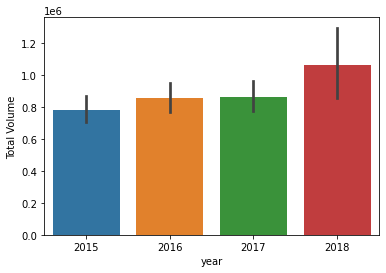

In [37]:
sns.barplot(data= avocado, x= 'year', y= 'Total Volume')

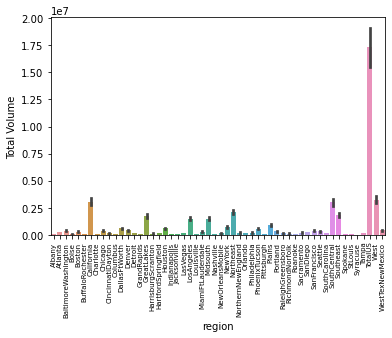

In [44]:
sns.barplot(data= avocado, x= 'region', y= 'Total Volume')
plt.xticks(rotation = 90, fontsize = 7);

In [30]:
avocado_pr = avocado[['Date','AveragePrice']]

In [31]:
avocado_pr

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [46]:
m = Prophet()

In [52]:
avocado_pr = avocado_pr.rename(columns={'Date':'ds','AveragePrice':'y'})

In [53]:
avocado_pr.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [54]:
m.fit(avocado_pr)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = m.make_future_dataframe(periods=365)

In [57]:
forecast = m.predict(future)

In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500084,0.854854,1.862322,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
1,2015-01-11,1.494831,0.862164,1.839953,1.494831,1.494831,-0.106332,-0.106332,-0.106332,-0.106332,-0.106332,-0.106332,0.0,0.0,0.0,1.388499
2,2015-01-18,1.489578,0.906162,1.841603,1.489578,1.489578,-0.106074,-0.106074,-0.106074,-0.106074,-0.106074,-0.106074,0.0,0.0,0.0,1.383504
3,2015-01-25,1.484325,0.859397,1.853537,1.484325,1.484325,-0.125065,-0.125065,-0.125065,-0.125065,-0.125065,-0.125065,0.0,0.0,0.0,1.359260
4,2015-02-01,1.479072,0.855776,1.794930,1.479072,1.479072,-0.153456,-0.153456,-0.153456,-0.153456,-0.153456,-0.153456,0.0,0.0,0.0,1.325615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.173476,0.545049,1.620608,0.992459,1.347091,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,0.0,0.0,0.0,1.086052
530,2019-03-22,1.172768,0.597405,1.575299,0.991014,1.347042,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,0.0,0.0,0.0,1.087055
531,2019-03-23,1.172061,0.540437,1.579422,0.988962,1.346724,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,0.0,0.0,0.0,1.088334
532,2019-03-24,1.171354,0.557070,1.605057,0.987423,1.346406,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,0.0,0.0,0.0,1.089870


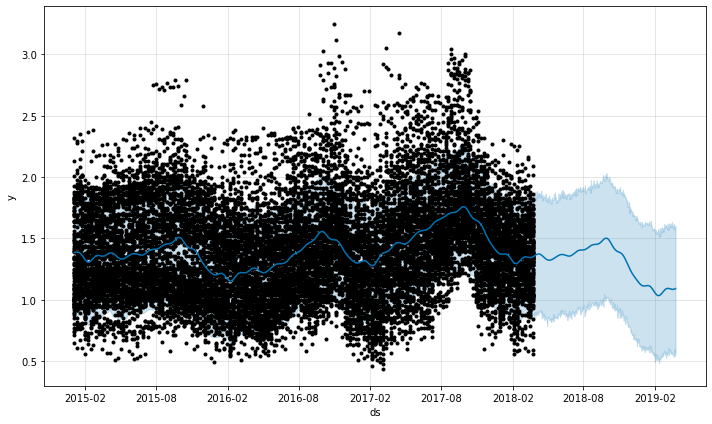

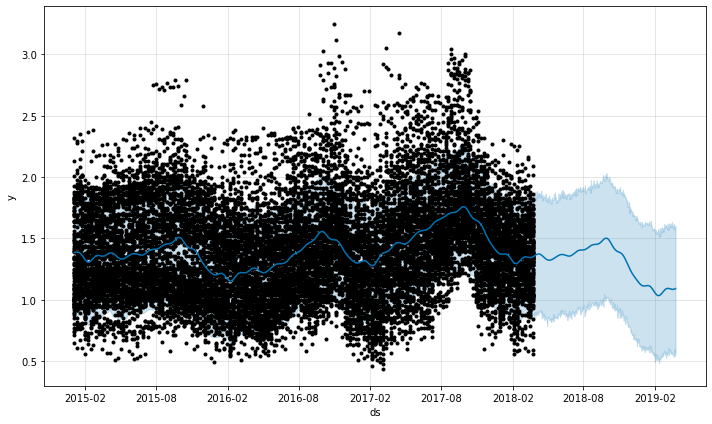

In [62]:
m.plot(forecast)

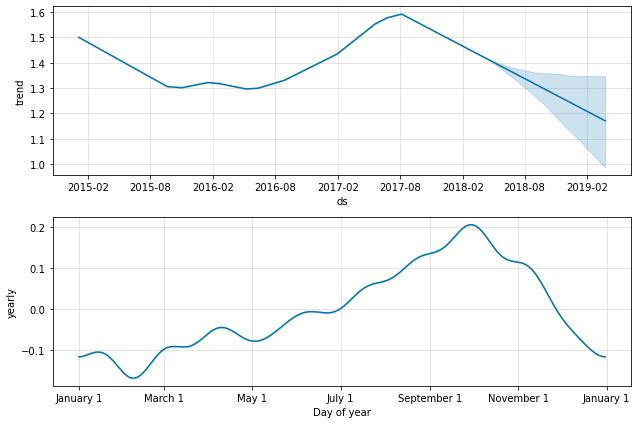

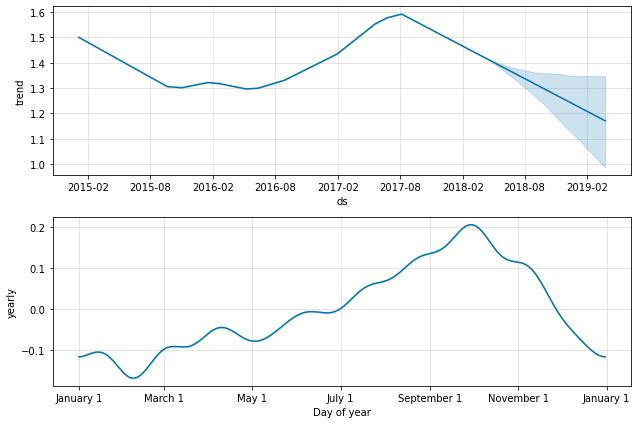

In [65]:
m.plot_components(forecast)

In [112]:
avocado_pr2 = avocado[['Date','AveragePrice','region']]

In [113]:
avocado_pr2 = avocado_pr2[avocado_pr2['region']=='West']

In [114]:
avocado_pr2.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)
avocado_pr2.drop(columns='region',inplace=True)

In [117]:
avocado_pr2

,ds,y
2704,2015-12-27,0.83
2705,2015-12-20,0.88
2706,2015-12-13,0.85
2707,2015-12-06,0.75
2708,2015-11-29,0.99
...,...,...
18232,2018-02-04,1.41
18233,2018-01-28,1.80
18234,2018-01-21,1.83
18235,2018-01-14,1.82


<AxesSubplot:xlabel='ds', ylabel='y'>

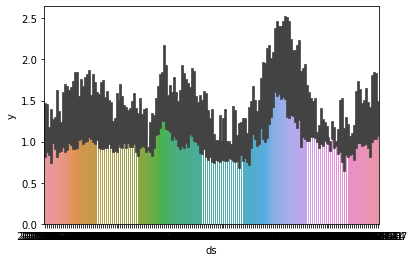

In [105]:
sns.barplot(data=avocado_pr2, x= 'ds', y='y')

In [118]:
m2 = Prophet()

In [119]:
m2.fit(avocado_pr2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
future2 = m2.make_future_dataframe(periods=365)
forecast2= m2.predict(future)

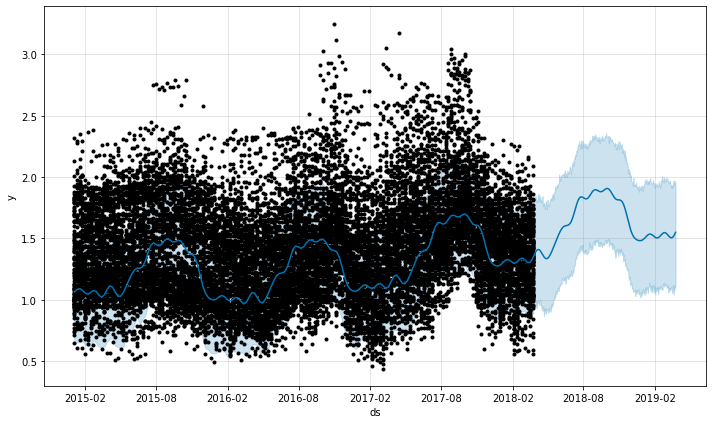

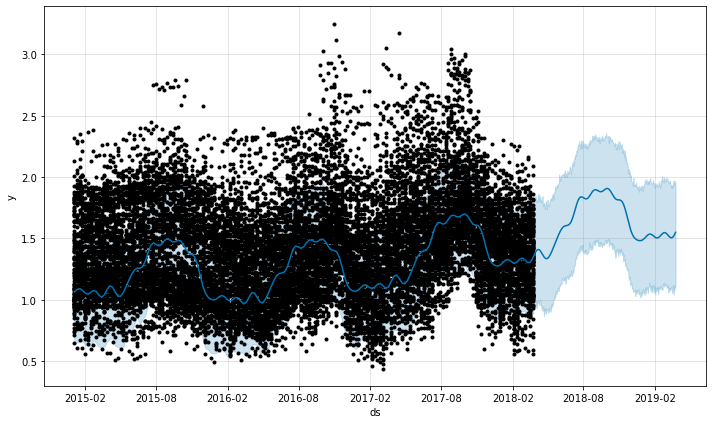

In [121]:
m.plot(forecast2)

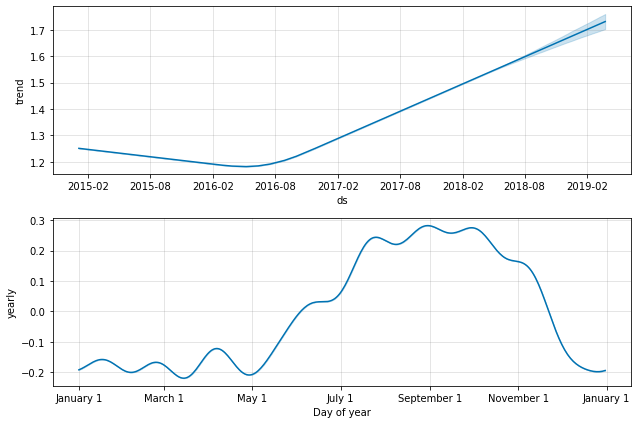

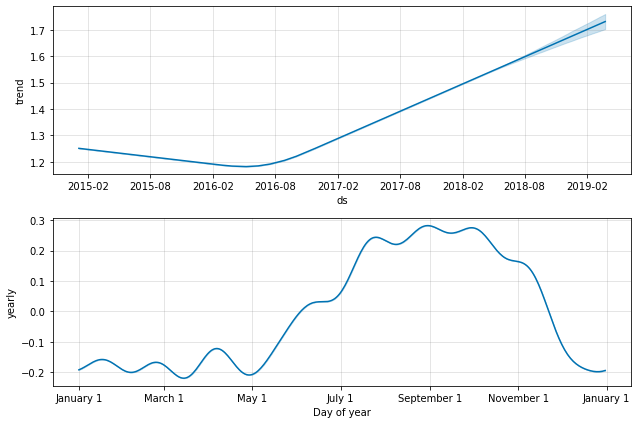

In [122]:
m2.plot_components(forecast2)